In [25]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the dataset
collegeplacement = pd.read_csv(r"C:\Users\yejaz\Downloads\Data\College Placement\placement-dataset.csv")

In [5]:
collegeplacement.head(15)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
5,5,7.1,48.0,1
6,6,5.7,143.0,0
7,7,5.0,63.0,0
8,8,6.1,156.0,0
9,9,5.1,66.0,0


In [6]:
print(collegeplacement.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
None


In [45]:
if 'Unnamed: 0' in collegeplacement.columns:
    # Remove the 'Unnamed: 0' column
    collegeplacement = collegeplacement.drop('Unnamed: 0', axis=1)
    print("Column 'Unnamed: 0' removed successfully.")
else:
    print("Column 'Unnamed: 0' not found in the DataFrame.")

Column 'Unnamed: 0' removed successfully.


In [46]:
collegeplacement.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [47]:
print(collegeplacement.isnull().sum())

cgpa         0
iq           0
placement    0
dtype: int64


In [49]:
collegecorrmatrix = collegeplacement.corr()

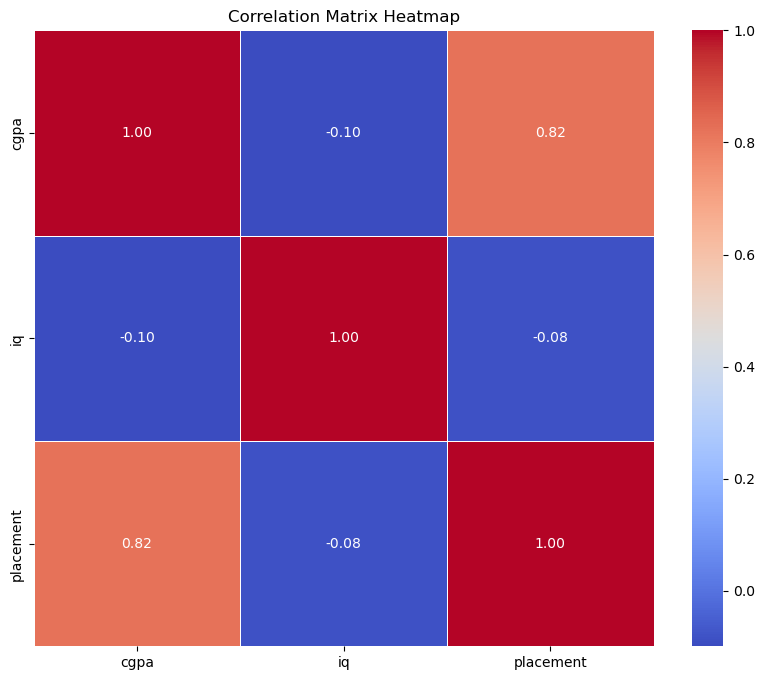

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(collegecorrmatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [51]:
X = collegeplacement[['iq', 'cgpa']]
y = collegeplacement['placement']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n{name} Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Random Forest Accuracy: 0.90
Confusion Matrix:
[[10  0]
 [ 2  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



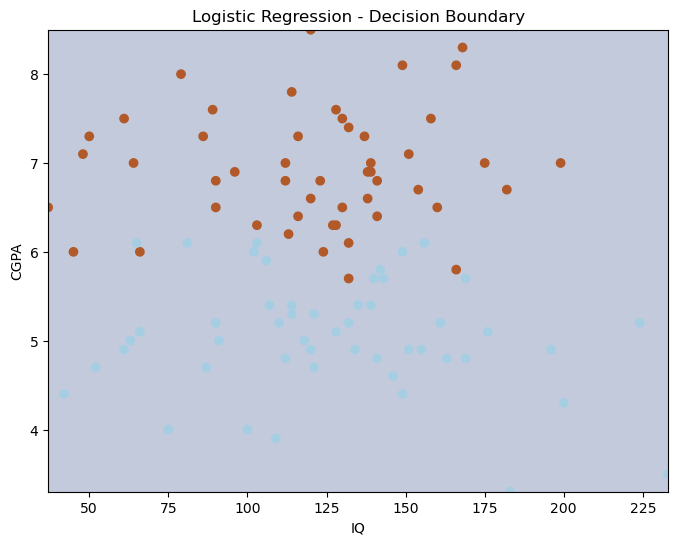

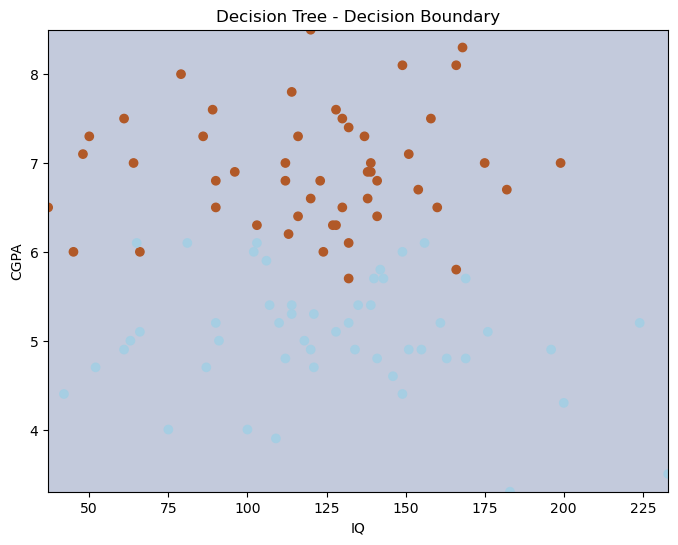

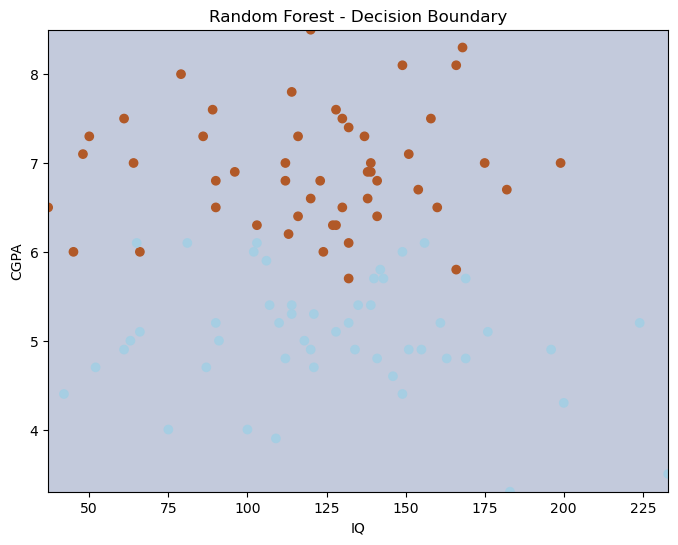

In [56]:
# Visualize the decision boundaries (for 2D datasets)
if X.shape[1] == 2:
    for name, model in models.items():
        plt.figure(figsize=(8, 6))
        # Plot decision boundary
        xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100),
                             np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3)
        
        # Plot data points
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
        plt.title(f'{name} - Decision Boundary')
        plt.xlabel('IQ')
        plt.ylabel('CGPA')
        plt.show()


Logistic Regression Accuracy: 0.85
Confusion Matrix:
[[9 1]
 [2 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



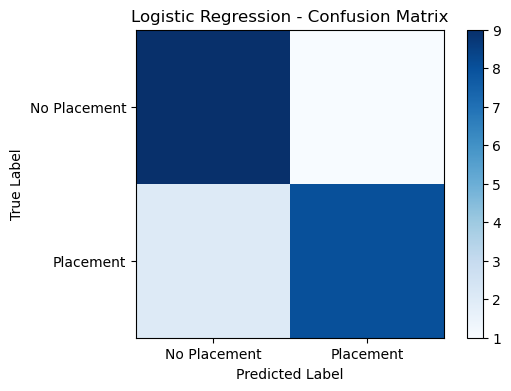


Decision Tree Accuracy: 0.85
Confusion Matrix:
[[9 1]
 [2 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



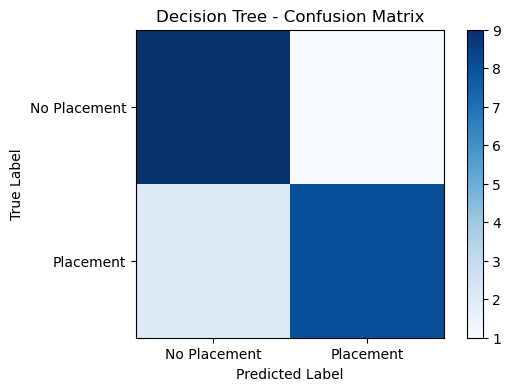


Random Forest Accuracy: 0.90
Confusion Matrix:
[[10  0]
 [ 2  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



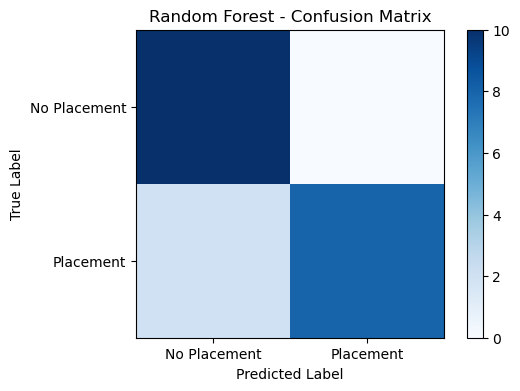

In [57]:
# ... (previous code)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy:.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Visualize the confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{name} - Confusion Matrix')
    plt.colorbar()

    classes = ['No Placement', 'Placement']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [58]:
# Assuming you have already trained a model (e.g., Random Forest) and saved it in the variable 'random_forest_model'
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)

def predict_placement():
    # Take user input for IQ and CGPA
    input_iq = float(input("Enter IQ between 30 and 250: "))
    input_cgpa = float(input("Enter CGPA between 0 and 10: "))

    # Standardize input features
    input_data = scaler.transform([[input_iq, input_cgpa]])

    # Make a prediction
    prediction = random_forest_model.predict(input_data)

    return prediction[0]

# Get the predicted placement status
predicted_placement = predict_placement()
print(f"Predicted Placement: {predicted_placement}")

Enter IQ between 30 and 250: 250
Enter CGPA between 0 and 10: 2.3
Predicted Placement: 0


C:\Users\yejaz\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
